In [1]:
'''
https://www.cs.princeton.edu/courses/archive/fall04/cos226/lectures/string.4up.pdf

https://www.geeksforgeeks.org/rabin-karp-algorithm-for-pattern-searching/
https://primo-tc-na01.hosted.exlibrisgroup.com/permalink/f/1786fk9/TN_cdi_crossref_primary_10_1109_ACCESS_2019_2914071
'''

# https://edutechlearners.com/download/Introduction_to_algorithms-3rd%20Edition.pdf (major referance)
# Coefficient representation
# Horner's rule A(x_0) = a_0 + x_0(a_1 + x_0(a_2 + ... + x_0(a_n-2 + x_0(a_n-1)))) 

def rabin_karp(pat, txt):
    n = len(pat)
    m = len(txt)
    d = 256 # characters in alphabet
    q = 33554393 # according to princeton edu it is which ever prime, entre pruebas descubri que si sirve, pero solo por el hecho de que hace fuerza bruta cuando encuentra hashes iguales, primos pequeños generan hashes iguales el fuerza bruta no los mete. Pero entonces hace pasas innecesarios.
    h = (d**(n-1)) % q   #  
    hashPatVal = 0
    hashTxtWinVal = 0
    indexList = []

    for i in range(n): #documento dice de 1 a n, pero como las listas van de 0 a n-1 eso se va a usar en vez
        hashPatVal = (d*hashPatVal + ord(pat[i])) % q
        hashTxtWinVal = (d*hashTxtWinVal + ord(txt[i])) % q # se utiliza ord para usar como char de c++ que se puede usar con ints
    
    j = 0
    for i in range(m-n+1):
        if hashPatVal == hashTxtWinVal:
            for j in range(n):
                if pat[j] != txt[i+j]:
                    break
                else: j += 1
            if j == n:
                indexList += [i]
        if i < m-n:
            hashTxtWinVal = (d * (hashTxtWinVal - ord(txt[i]) * h) + ord(txt[i + n])) % q
            if hashTxtWinVal < 0:
                hashTxtWinVal += q
    return indexList
    
print(rabin_karp("GEEK", "GEEKSFORGEEKS"))
print(rabin_karp("1234", "1234567812345"))

with open('../FuerzaBruta/harrypotter1.txt', 'r') as file:
    txt = file.read().replace('\n', ' ')
    harryList = rabin_karp("Harry", txt)
    print(len(harryList))
        

[0, 8]
[0, 8]
1672


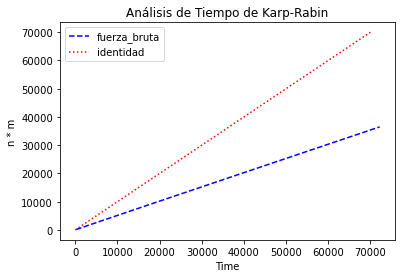

In [5]:
import matplotlib.pyplot  as plt
import numpy as np
import math as m

def rabin_karp_instrumentado(pat, txt):
    n = len(pat)
    m = len(txt)
    d = 256
    q = 33554393
    h = (d**(n-1)) % q
    hashPatVal = 0
    hashTxtWinVal = 0
    indexList = []
    cont = 0 # de la instrumentacion

    for i in range(n):
        hashPatVal = (d*hashPatVal + ord(pat[i])) % q
        hashTxtWinVal = (d*hashTxtWinVal + ord(txt[i])) % q
    
    j = 0
    for i in range(m-n+1):
        cont += 1 # por el == de abajo
        if hashPatVal == hashTxtWinVal:
            for j in range(n):
                cont += 1 # por el != de abajo
                if pat[j] != txt[i+j]:
                    break
                else: j += 1
            # esto solo esta verificando que llego hasta abajo no comparando caracteres o hashes
            if j == n:
                indexList += [i]
        if i < m-n:
            hashTxtWinVal = (d * (hashTxtWinVal - ord(txt[i]) * h) + ord(txt[i + n])) % q
            if hashTxtWinVal < 0:
                hashTxtWinVal += q
    return cont

def test_rabin_karp_instrumentado(start, end, inc):
    graph = []
    graph.append([])
    graph.append([])
    for i in range(start, end, inc):
        a = "aa" * i
        b = "a" * i
        graph[0] += [len(a) * len(b)]
        graph[1] += [rabin_karp_instrumentado(b, a)]
    return graph

g = test_rabin_karp_instrumentado(10, 200, 10)
tempX = list(range(10, 70000, 10))
plt.plot(g[0], g[1],  "--", color="blue", label="rabin_karp") 
plt.plot(tempX, tempX, ":", color="red", label="identidad")
plt.legend()
plt.xlabel('Time')
plt.ylabel("n * m")
plt.title("Análisis de Tiempo de Karp-Rabin")
plt.show()